### Notebook for **manual** creation of anndata object and adding the images and spatial coordinates to of Xenium add-on panel healthy gut data
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Created date:** 25th March 2024
- **Last modified date:** 10th April 2024

##### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq

#### Set up working environment

In [ ]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

#### Data upload

+ Upload anndata object

In [50]:
adata = sc.read_10x_h5(
    filename="/../Non-diseased_pre-designed_and_add-on_panel/add_on_Xenium_colon/cell_feature_matrix.h5"
)

+ Upload cell coordinates

In [51]:
df = pd.read_csv(
    "/../Non-diseased_pre-designed_and_add-on_panel/add_on_Xenium_colon/cells.csv"
)

+ Add cell coordinates to anndata object

In [52]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [53]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [59]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes,n_counts
aaaagkoa-1,aaaagkoa-1,830.147217,836.563416,284,0,0,0,0,284.0,653.365805,23.120001,59,4.094345,5.652489,58.450704,76.056338,96.830986,100.0,284.0
aaablbol-1,aaablbol-1,735.468018,854.389282,116,0,0,0,0,116.0,651.243461,12.643750,39,3.688879,4.762174,65.517241,82.758621,100.000000,100.0,116.0
aaabogma-1,aaabogma-1,847.423462,846.633240,170,0,0,0,0,170.0,674.544087,18.152813,32,3.496508,5.141664,72.941176,92.941176,100.000000,100.0,170.0
aaabpdim-1,aaabpdim-1,1543.696045,4223.798340,61,0,0,0,0,61.0,172.406569,11.379375,25,3.258097,4.127134,75.409836,91.803279,100.000000,100.0,61.0
aaabpfoj-1,aaabpfoj-1,1551.099121,4220.062988,105,0,0,0,0,105.0,283.490948,56.806565,33,3.526361,4.663439,73.333333,87.619048,100.000000,100.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oikabfkp-1,oikabfkp-1,8284.036133,3061.574951,219,0,0,0,0,219.0,70.308284,38.563439,49,3.912023,5.393628,56.164384,79.908676,100.000000,100.0,219.0
oikalpjm-1,oikalpjm-1,8267.514648,3067.372314,173,0,0,0,0,173.0,45.743283,11.334219,50,3.931826,5.159055,54.913295,75.722543,100.000000,100.0,173.0
oikamhom-1,oikamhom-1,8260.333984,3068.529053,369,0,0,0,0,369.0,104.040004,46.691564,66,4.204693,5.913503,49.864499,73.170732,95.663957,100.0,369.0
oikaoaef-1,oikaoaef-1,8281.400391,3071.849365,176,0,0,0,0,176.0,59.696565,13.275938,53,3.988984,5.176150,49.431818,72.727273,98.295455,100.0,176.0


+ Add scale factors

In [ ]:
scale_factors = {"tissue_hires_scalef": 0.000006000112943,
                "tissue_lowres_scalef": 0.000024000451773}

In [ ]:
spatial_key = "spatial"
library_id = "spatial"

In [ ]:
adata.uns["spatial"] = dict()
adata.uns["spatial"][library_id] = dict()

In [ ]:
adata.uns[spatial_key] = {library_id: {}}
adata.uns[spatial_key][library_id]["images"] = {}

In [ ]:
adata.uns['spatial']['spatial']["scalefactors"] = scale_factors

#### Calculate quality control metrics

In [55]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [56]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.004557884848285757
Negative decoding count % : 0.003657879377538216


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

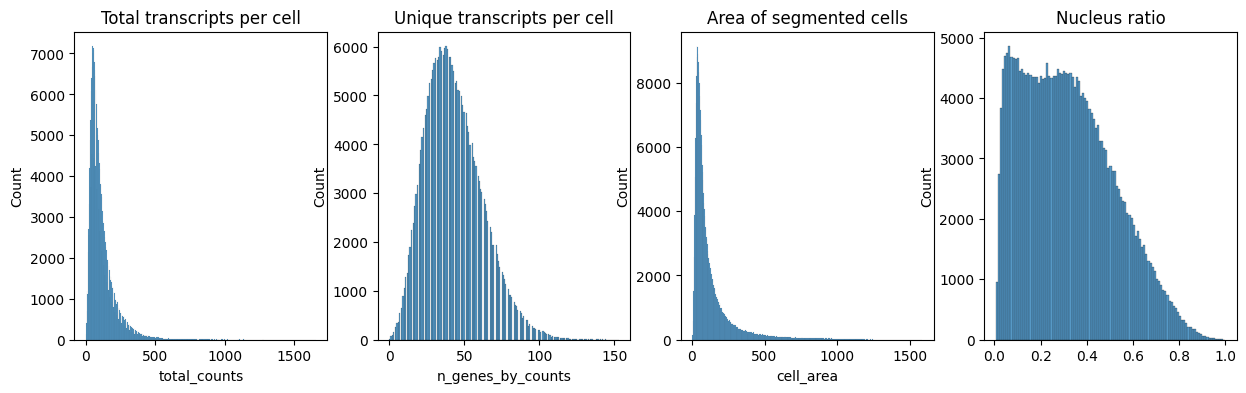

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

+ Filter the cells

In [58]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

+ Visualize clusters

In [13]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/amaguza/miniforge3/envs/squidpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/amaguza/miniforge3/envs/squidpy_env/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/amaguza/miniforge3/envs/squidpy_env/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


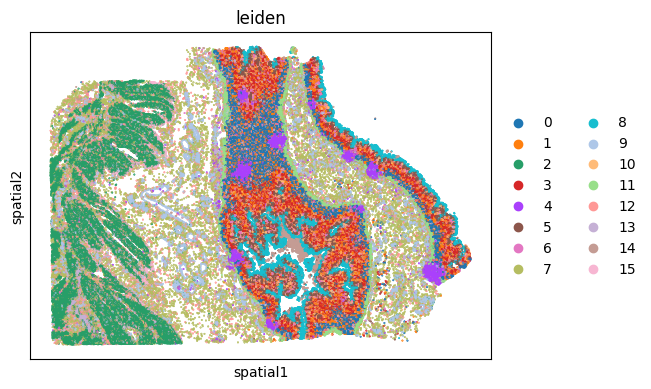

In [14]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

+ Visualize important genes

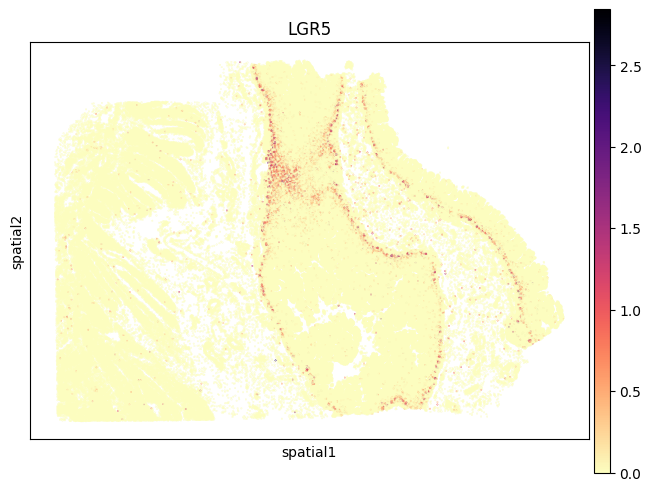

In [21]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    color=[
        "LGR5"
    ],
    shape=None,
    size=0.1,
    img=True,
    cmap = "magma_r",
)

#### Export anndata object

In [ ]:
adata.X = adata.layers["counts"].copy()

In [60]:
adata.write_h5ad('/.../10X_Xenium_add-on_without_image.h5ad')